In [83]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [84]:
data_frame = pd.read_csv('data.csv')
data_frame.head()

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
0,0.95822,3.4,8.2,53.0,47.0
1,0.85566,3.2,5.9,55.0,35.0
2,0.68025,3.2,9.3,41.0,32.0
3,0.25936,3.2,8.2,47.0,34.0
4,0.60447,3.8,10.0,75.0,33.0


## DATA PROCESSING


In [85]:
data_frame['Attendance (%)'] = data_frame['Attendance (%)'] / 100
data_frame

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
0,0.95822,3.4,8.2,0.53,47.0
1,0.85566,3.2,5.9,0.55,35.0
2,0.68025,3.2,9.3,0.41,32.0
3,0.25936,3.2,8.2,0.47,34.0
4,0.60447,3.8,10.0,0.75,33.0
...,...,...,...,...,...
1383,0.44549,5.5,8.0,0.51,41.0
1384,0.52466,4.9,6.5,0.63,37.0
1385,0.88197,3.9,6.2,0.54,36.0
1386,0.47336,3.5,7.3,0.61,34.0


In [86]:
data_frame.isnull().sum()

Socioeconomic Score    0
Study Hours            0
Sleep Hours            0
Attendance (%)         0
Grades                 0
dtype: int64

In [87]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1388 entries, 0 to 1387
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Socioeconomic Score  1388 non-null   float64
 1   Study Hours          1388 non-null   float64
 2   Sleep Hours          1388 non-null   float64
 3   Attendance (%)       1388 non-null   float64
 4   Grades               1388 non-null   float64
dtypes: float64(5)
memory usage: 54.3 KB


In [88]:
data_frame.describe()

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
count,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000
mean,0.552274,4.560807,8.047262,0.585360,40.691643
std,0.261272,1.897581,1.370700,0.116753,9.467358
min,0.101280,0.800000,4.800000,0.400000,32.000000
25%,0.322118,3.475000,7.000000,0.490000,34.000000
50%,0.545945,3.900000,8.400000,0.570000,35.000000
75%,0.789610,5.900000,9.100000,0.660000,47.000000
max,0.999820,10.000000,10.000000,1.000000,91.000000


## OUTLIERS

In [89]:
Q1 = data_frame['Grades'].quantile(0.25)
Q3 = data_frame['Grades'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data_frame[(data_frame['Grades'] < lower_bound) | (data_frame['Grades'] > upper_bound)]


In [90]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1388 entries, 0 to 1387
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Socioeconomic Score  1388 non-null   float64
 1   Study Hours          1388 non-null   float64
 2   Sleep Hours          1388 non-null   float64
 3   Attendance (%)       1388 non-null   float64
 4   Grades               1388 non-null   float64
dtypes: float64(5)
memory usage: 54.3 KB


## DATA VISUALIZATION



In [91]:
data_frame.head()

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
0,0.95822,3.4,8.2,0.53,47.0
1,0.85566,3.2,5.9,0.55,35.0
2,0.68025,3.2,9.3,0.41,32.0
3,0.25936,3.2,8.2,0.47,34.0
4,0.60447,3.8,10.0,0.75,33.0


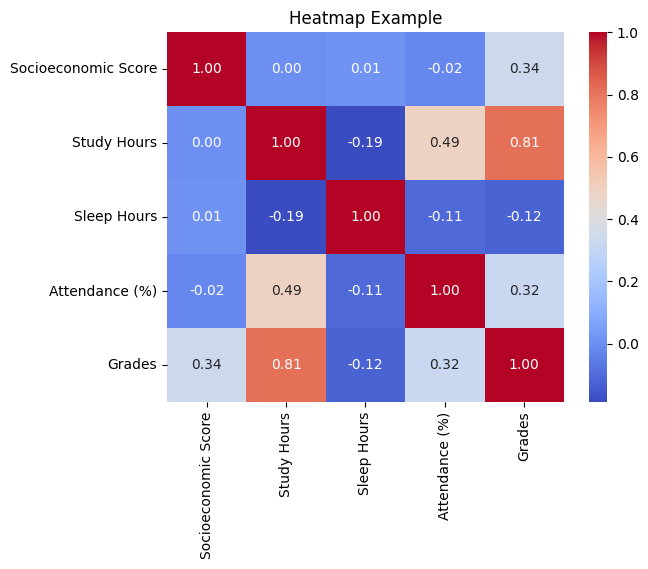

In [92]:
import seaborn as sns

# Vẽ Heatmap cho ma trận tương quan
corr_matrix = data_frame.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Example')
plt.show()


## TRAINING MODEL 

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
data_frame.head()

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
0,0.95822,3.4,8.2,0.53,47.0
1,0.85566,3.2,5.9,0.55,35.0
2,0.68025,3.2,9.3,0.41,32.0
3,0.25936,3.2,8.2,0.47,34.0
4,0.60447,3.8,10.0,0.75,33.0


In [95]:
X = data_frame[['Socioeconomic Score', 'Study Hours','Sleep Hours','Attendance (%)']]  # Các đặc trưng (features)
y = data_frame['Grades']  # Cột mục tiêu (target)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [98]:
y_pred = model.predict(X_test)
# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 19.272537728751253
R² Score: 0.7446674729714068


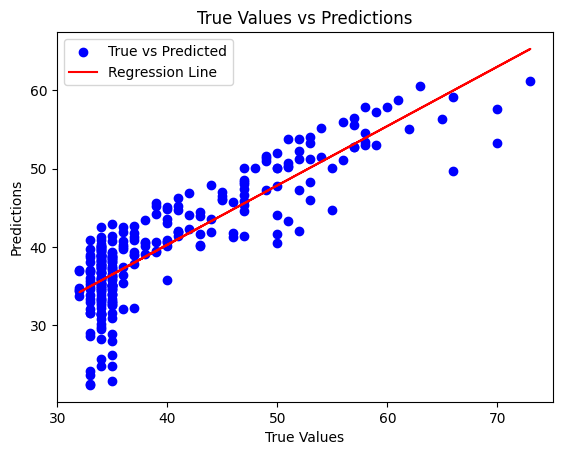

In [99]:
import numpy as np
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color='b', label='True vs Predicted')
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m * y_test + b, color='r', label='Regression Line')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.legend()
plt.show()


## TEST DATA 


In [100]:
df = pd.read_csv('test.csv')
df['Attendance (%)'] = df['Attendance (%)']/100
df

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%)
0,0.152828,3.285995,7.584963,0.727378
1,0.682162,3.587718,5.788161,0.685634
2,0.128518,3.046838,8.138100,0.743859
3,0.545109,3.517834,8.160871,0.540211
4,0.614894,3.987437,9.690352,0.771849
5,0.158597,3.251243,7.716926,0.709425
6,0.932113,3.663268,6.067962,0.442685
7,0.469487,3.327121,7.276577,0.769267
8,0.538954,3.370221,7.008031,0.606614
9,0.182663,3.589434,9.189035,0.790034


In [101]:
predict = model.predict(df)
results = pd.DataFrame(predict)
df['Predict'] = results
df

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Predict
0,0.152828,3.285995,7.584963,0.727378,29.426721
1,0.682162,3.587718,5.788161,0.685634,37.087657
2,0.128518,3.046838,8.138100,0.743859,28.107285
3,0.545109,3.517834,8.160871,0.540211,36.539627
4,0.614894,3.987437,9.690352,0.771849,38.145514
5,0.158597,3.251243,7.716926,0.709425,29.493020
6,0.932113,3.663268,6.067962,0.442685,42.116238
7,0.469487,3.327121,7.276577,0.769267,33.117842
8,0.538954,3.370221,7.008031,0.606614,35.174884
9,0.182663,3.589434,9.189035,0.790034,30.973613
